In [8]:
import pandas as pd
import numpy as np
import collections
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import math 



In [9]:
train = pd.read_hdf('../pml7/module3/input/train.car_price.h5')
test = pd.read_hdf('../pml7/module3/input/test.car_price.h5') #zbiór testowy bez odpowiedzi

In [10]:
def merge_with_features(csv_file, train_df, test_df):
    csv_file = csv_file.replace('test', 'REPLACE')
    csv_file = csv_file.replace('train', 'REPLACE')
    try:
        features_train = pd.read_csv('output/' + csv_file.replace('REPLACE', 'train'))
        
        for cl in features_train.columns[1:]:
            if cl != 'car_id':
                train_df.drop([cl], axis=1, errors='ignore', inplace=True)
            
        train_df = pd.merge(train_df, features_train, on=['car_id', 'car_id'])
        print('train') 
        print(features_train.columns)
    except:
        print('FAIL: train')
    try:
        features_test = pd.read_csv('output/' + csv_file.replace('REPLACE', 'test'))
        
        for cl in features_train.columns[1:]:
            if cl != 'car_id':
                test_df.drop([cl], axis=1, errors='ignore', inplace=True)
            
        test_df = pd.merge(test_df, features_test, on=['car_id', 'car_id'])
        print('test')
        print(features_test.columns)
    except:
        print('FAIL: test')
        
    return train_df, test_df


In [11]:
def convert_date_to_unix(pl_date_string):
    if pl_date_string is not None and len(pl_date_string) > 12:
        hour, date = pl_date_string.split(', ')

        date = date.replace(' stycznia ', '.01.')
        date = date.replace(' lutego ', '.02.')
        date = date.replace(' marca ', '.03.')
        date = date.replace(' kwietnia ', '.04.')
        date = date.replace(' maja ', '.05.')
        date = date.replace(' czerwca ', '.06.')
        date = date.replace(' lipca ', '.07.')
        date = date.replace(' sierpnia ', '.08.')
        date = date.replace(' wrzesnia ', '.09.')
        date = date.replace(' pazdziernika ', '.10.')
        date = date.replace(' listopada ', '.11.')
        date = date.replace(' grudnia ', '.12.')

        day, month, year = date.split('.')
        if len(day) < 2:
            day = '0' + day

        conv_date = year + '-' + month + '-' + day + ' ' + hour + ':00'
        return pd.to_datetime(conv_date).value / 10**9
    
    return pd.to_datetime('1970-01-01 00:00:00').value / 10**9

#print(convert_date_to_unix('12:11, 2 marca 2018'))
#print(convert_date_to_unix('12:11, 28 lutego 2018'))
#print(convert_date_to_unix('1:1, 1 maja 2018'))
#print(convert_date_to_unix(''))

train['created_at_unix'] = train.apply(lambda row: convert_date_to_unix(row.created_at), axis=1)
test['created_at_unix'] = test.apply(lambda row: convert_date_to_unix(row.created_at), axis=1)


In [ ]:
#print(stats.describe(train['created_at_unix']))
#print(stats.describe(test['created_at_unix']))

#print(stats.describe(train[train['created_at_unix'] != 0.0]['created_at_unix']))
#print(stats.describe(test[test['created_at_unix'] != 0.0]['created_at_unix']))
total = pd.concat([train, test], ignore_index=True)
print(stats.describe(total[total['created_at_unix'] != 0.0]['created_at_unix']))

train['created_at_unix_na_mean'] = train['created_at_unix']
train.loc[train['created_at_unix_na_mean'] == 0.0, 'created_at_unix_na_mean'] = 1520015721.947836
print(stats.describe(train['created_at_unix_na_mean']))
test['created_at_unix_na_mean'] = test['created_at_unix']
test.loc[test['created_at_unix_na_mean'] == 0.0, 'created_at_unix_na_mean'] = 1520015721.947836
print(stats.describe(test['created_at_unix_na_mean']))

test[['car_id', 'created_at_unix', 'created_at_unix_na_mean']].to_csv('output/ft_created_at_unix_test.csv', index=False) 
train[['car_id', 'created_at_unix', 'created_at_unix_na_mean']].to_csv('output/ft_created_at_unix_train.csv', index=False) 


In [66]:
#train, test = merge_with_features('ft_created_at_unix_train.csv', train, test)

train
Index(['car_id', 'created_at_unix', 'created_at_unix_na_mean'], dtype='object')
test
Index(['car_id', 'created_at_unix', 'created_at_unix_na_mean'], dtype='object')


In [100]:
def get_month(pl_date_string):
    if pl_date_string is not None and len(pl_date_string) > 12:
        hour, date = pl_date_string.split(', ')
        day, month, year = date.split(' ')
        return month
    return 'NA'


collections.Counter(train.apply(lambda row: get_month(row.created_at), axis=1))

Counter({'marca': 81482,
         'lutego': 24887,
         'NA': 109,
         'stycznia': 15,
         'grudnia': 1})

0        2018-03-05 13:23:00
1        2018-03-05 15:48:00
2        2018-03-04 06:30:00
3        2018-03-03 08:46:00
4        2018-03-03 20:00:00
                 ...        
106489   2018-02-27 15:12:00
106490   2018-02-22 16:23:00
106491   2018-03-03 21:12:00
106492   2018-02-28 16:10:00
106493   2018-03-03 09:11:00
Name: created_at_unix_na_mean, Length: 106291, dtype: datetime64[ns]


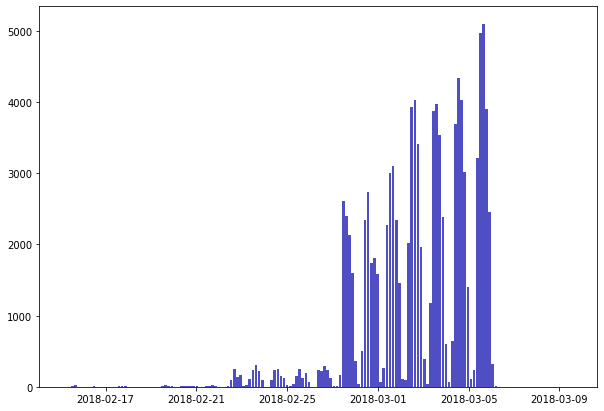

In [99]:
created_at_unix_na_mean = pd.to_datetime(train[train["created_at_unix_na_mean"] > (pd.to_datetime('2018-02-15 00:00:00').value / 10**9)]["created_at_unix_na_mean"],unit='s')
print(created_at_unix_na_mean)
plt.rcParams['figure.figsize'] = [10, 7]
n, bins, patches = plt.hist(x=created_at_unix_na_mean, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

In [111]:
print(min(pd.to_datetime(train["created_at_unix_na_mean"],unit='s')))
print(max(pd.to_datetime(train["created_at_unix_na_mean"],unit='s')))
print(min(pd.to_datetime(test["created_at_unix_na_mean"],unit='s')))
print(max(pd.to_datetime(test["created_at_unix_na_mean"],unit='s')))


2017-12-22 17:54:00
2018-03-09 13:30:00
2017-12-23 06:35:00
2018-03-09 09:47:00


In [128]:
def pln_to_eur(unix_timestamp):
    rate = 0.0
    datetime = pd.to_datetime(unix_timestamp, unit='s')
    
    if   datetime <= pd.to_datetime('2017-12-17 23:59:59'): rate = 4.1918
    elif datetime <= pd.to_datetime('2017-12-24 23:59:59'): rate = 4.1767
    elif datetime <= pd.to_datetime('2017-12-31 23:59:59'): rate = 4.1504
    elif datetime <= pd.to_datetime('2018-01-07 23:59:59'): rate = 4.1714
    elif datetime <= pd.to_datetime('2018-01-14 23:59:59'): rate = 4.1729
    elif datetime <= pd.to_datetime('2018-01-21 23:59:59'): rate = 4.1373
    elif datetime <= pd.to_datetime('2018-01-28 23:59:59'): rate = 4.1688
    elif datetime <= pd.to_datetime('2018-02-04 23:59:59'): rate = 4.1836
    elif datetime <= pd.to_datetime('2018-02-11 23:59:59'): rate = 4.1585
    elif datetime <= pd.to_datetime('2018-02-18 23:59:59'): rate = 4.1737
    elif datetime <= pd.to_datetime('2018-02-25 23:59:59'): rate = 4.1878
    elif datetime <= pd.to_datetime('2018-03-04 23:59:59'): rate = 4.1943
    elif datetime <= pd.to_datetime('2018-03-11 23:59:59'): rate = 4.2207
    elif datetime <= pd.to_datetime('2018-03-18 23:59:59'): rate = 4.2286
    elif datetime <= pd.to_datetime('2018-03-25 23:59:59'): rate = 4.2172

    return rate

#pln_to_eur(pd.to_datetime('1970-01-01 00:00:00').value / 10**9)
#pln_to_eur(pd.to_datetime('2017-12-22 17:54:00').value / 10**9)
#pln_to_eur(pd.to_datetime('2018-03-09 13:30:00').value / 10**9)

train['pln_to_eur'] = train.apply(lambda row: pln_to_eur(row.created_at_unix_na_mean), axis=1)
test['pln_to_eur'] = test.apply(lambda row: pln_to_eur(row.created_at_unix_na_mean), axis=1)


print(collections.Counter(train['price_currency'])) # przeliczyc na PLN zm celu
print(collections.Counter(test['price_currency'])) # przeliczyc na PLN zm celu

train['price_value_pln'] = train.apply(lambda row: 
                                       row.price_value if row.price_currency == 'PLN' 
                                       else row.price_value * row.pln_to_eur, axis=1)
print(stats.describe(train['price_value']))
print(stats.describe(train['price_value_pln']))

# to bedzie trzeba odwrocic potem : 
#test['price_value_pln'] = test.apply(lambda row: 
#                                       row.price_value if row.price_currency == 'PLN' 
#                                       else row.price_value / row.pln_to_eur, axis=1)


Counter({'PLN': 106290, 'EUR': 204})
Counter({'PLN': 53998, 'EUR': 124})
DescribeResult(nobs=106494, minmax=(400.0, 799900.0), mean=47534.137437038706, variance=4396845939.278786, skewness=4.089344890145452, kurtosis=24.04545263683297)
DescribeResult(nobs=106494, minmax=(500.0, 2304080.13), mean=47729.32524731628, variance=4572451507.05669, skewness=4.644660876822656, kurtosis=41.463506384440954)


DescribeResult(nobs=106494, minmax=(500.0, 2304080.13), mean=47729.32524731628, variance=4572451507.05669, skewness=4.644660876822656, kurtosis=41.463506384440954)


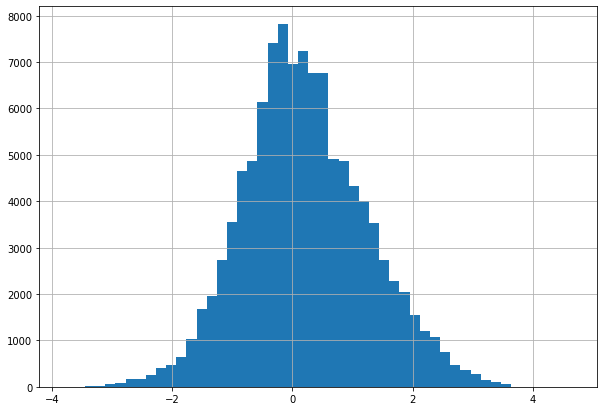

In [131]:
print(stats.describe(train['price_value_pln']))
train['price_value_pln_log_transl'] = train.apply(lambda row: math.log(row.price_value_pln) - 10, axis=1)
%matplotlib inline
# only in a Jupyter notebook
#train['price_value_pln'].hist(bins=50, figsize=(20,15))
train['price_value_pln_log_transl'].hist(bins=50, figsize=(10,7))
plt.show()

In [130]:
train[['car_id', 'pln_to_eur', 'price_value_pln', 'price_value_pln_log_transl']].to_csv('output/ft_price_train.csv', index=False) 
test[['car_id', 'pln_to_eur']].to_csv('output/ft_price_test.csv', index=False) 


In [120]:
print(collections.Counter(train['price_details'])) # kolumny dummy
##print(collections.Counter(test['price_details'])) # BRAK

Counter({'Cena Brutto, Do negocjacji': 49422, 'Cena Brutto': 29148, 'Cena Brutto, Faktura VAT': 13781, 'Cena Brutto, Do negocjacji, Faktura VAT': 7528, 'Cena Netto, Faktura VAT': 2828, 'Cena Netto, Do negocjacji, Faktura VAT': 2277, 'Cena Netto': 716, 'Cena Netto, Do negocjacji': 685, 'Brutto                                        , Do negocjacji': 51, 'Brutto': 27, 'Brutto                    , Faktura VAT': 10, 'Brutto                    , Faktura VAT                    , Do negocjacji': 10, 'Netto                    , Faktura VAT                    , Do negocjacji': 5, 'Netto                    , Faktura VAT': 3, 'Netto                                        , Do negocjacji': 2, 'Gross': 1})


In [54]:
import requests

def getLocation(address):
    URL = "https://geocode.search.hereapi.com/v1/geocode"
    location = address
    api_key = 'RtfNRPbd7iGjPosq8nIY-rzyetVq8GKoiR0gh4NURnk' # Acquire from developer.here.com
    PARAMS = {'apikey':api_key,'q':location} 

    try:
        # sending get request and saving the response as response object 
        r = requests.get(url = URL, params = PARAMS) 
        data = r.json()

        latitude = data['items'][0]['position']['lat']
        longitude = data['items'][0]['position']['lng']
    except:
        latitude, longitude = -1, -1

    return latitude, longitude

#print(getLocation('Rząska, ul. Zagruszcze 8'))
#print(getLocation('Topolowa 38/1'))

train[['latitude', 'longitude']] = train.apply(lambda row: pd.Series(getLocation(row['seller_address'])), axis=1)
#train[['car_id', 'latitude', 'longitude']].to_csv('output/ft_latitude_longitude_train.csv', index=False) 

test[['latitude', 'longitude']] = test.apply(lambda row: pd.Series(getLocation(row['seller_address'])), axis=1)
#test[['car_id', 'latitude', 'longitude']].to_csv('output/ft_latitude_longitude_test.csv', index=False) 

#train, test = merge_with_features('ft_latitude_longitude_test.csv', train, test)

train
Index(['car_id', 'latitude', 'longitude'], dtype='object')
test
Index(['car_id', 'latitude', 'longitude'], dtype='object')


In [55]:
problematic_seller_address = collections.Counter(train[(train['latitude'] == -1) & (train['longitude'] == -1)]['seller_address'])
problematic_seller_address_df = pd.DataFrame.from_dict(problematic_seller_address, orient='index')
problematic_seller_address_df.sort_values(by=[0], inplace=True, ascending=False)
problematic_seller_address_df

,0
NaN,109
"JANA PAWŁA / OBYWATELSKA przy MYJNI ul JASIEŃ 38 - 93-562 Łódź, Górna (Polska)",91
"ul. Łokietka 83/drugi oddział Gaj ul. Myślenicka 7 - 31-280 Kraków, Krowodrza (Polska)",34
"ul.Milczańska 31 c wejście z parkingu TESCO - 70-107 Szczecin, Śródmieście (Polska)",33
"Najtańsze samochody Katowice - Warszawa Kraków, Podgórze (Polska)",27
"DTŚ 2 - 44-100 Katowice, Śródmieście (Polska)",24
"Zgierz, Łódzka 28/ Brukowa 2/ Przybyszewskiego 176 - 91-341 Łódź, Łódzkie (Polska)",18
"Poznań ul Kościelna 58, Suchy Las ul Obornicka 137 - 62-002 Suchy Las, poznański, Wielkopolskie (Polska)",16
"Asnyka vis avis galerii Gdowskiej - 32-420 Gdów, wielicki, Małopolskie (Polska)",14
"route de millau - 12500 Espalion, espalion, Languedoc-Roussillon-Midi-Pyrénées (Francja)",14


In [56]:
print(train[(train['latitude'] == -1) & (train['longitude'] == -1)][['seller_address', 'seller_name']])

                                           seller_address  \
127     ul. Łokietka 83/drugi oddział Gaj ul. Myślenic...   
158     JANA PAWŁA / OBYWATELSKA przy MYJNI ul JASIEŃ ...   
895     JANA PAWŁA / OBYWATELSKA przy MYJNI ul JASIEŃ ...   
1040        DTŚ 2 - 44-100 Katowice, Śródmieście (Polska)   
1498                                                 None   
...                                                   ...   
105274  JANA PAWŁA / OBYWATELSKA przy MYJNI ul JASIEŃ ...   
106013  Rudawa ul Śląska(obok Składu z Kostka Brukową)...   
106102                                               None   
106414  JANA PAWŁA / OBYWATELSKA przy MYJNI ul JASIEŃ ...   
106483      DTŚ 2 - 44-100 Katowice, Śródmieście (Polska)   

                                              seller_name  
127                                   WADOWSCY SP. Z O.O.  
158     KomisORZEŁ M.Matejas Dealer Ssangyong Romet&BA...  
895     KomisORZEŁ M.Matejas Dealer Ssangyong Romet&BA...  
1040    Autoryzowany Dealer

In [57]:
## po manulanym sprawdzeniu w problematic_seller_address_df.ods
train.loc[(train['seller_address'] == 'JANA PAWŁA / OBYWATELSKA przy MYJNI ul JASIEŃ 38 - 93-562 Łódź, Górna (Polska)'), ['latitude', 'longitude']] = 51.73546, 19.44122
train.loc[(train['seller_address'] == 'ul. Łokietka 83/drugi oddział Gaj ul. Myślenicka 7 - 31-280 Kraków, Krowodrza (Polska)'), ['latitude', 'longitude']] = 50.09159, 19.91841
train.loc[(train['seller_address'] == 'ul.Milczańska 31 c  wejście z parkingu TESCO - 70-107 Szczecin, Śródmieście (Polska)'), ['latitude', 'longitude']] = 53.40677, 14.51759
train.loc[(train['seller_address'] == 'Najtańsze samochody Katowice - Warszawa Kraków, Podgórze (Polska)'), ['latitude', 'longitude']] = 50.03838, 20.01246
train.loc[(train['seller_address'] == 'DTŚ 2 - 44-100 Katowice, Śródmieście (Polska)'), ['latitude', 'longitude']] = 50.29133, 18.93188
train.loc[(train['seller_address'] == 'Zgierz, Łódzka 28/ Brukowa 2/ Przybyszewskiego 176 - 91-341 Łódź, Łódzkie (Polska)'), ['latitude', 'longitude']] = 51.75178, 19.5028
train.loc[(train['seller_address'] == 'Poznań ul Kościelna 58, Suchy Las ul Obornicka 137 - 62-002 Suchy Las, poznański, Wielkopolskie (Polska)'), ['latitude', 'longitude']] = 52.47951, 16.86549
train.loc[(train['seller_address'] == 'Asnyka vis avis galerii Gdowskiej - 32-420 Gdów, wielicki, Małopolskie (Polska)'), ['latitude', 'longitude']] = 49.90828, 20.20113
train.loc[(train['seller_address'] == 'route de millau - 12500 Espalion, espalion, Languedoc-Roussillon-Midi-Pyrénées (Francja)'), ['latitude', 'longitude']] = 44.49645, 2.73812
train.loc[(train['seller_address'] == 'GAJKÓW  ul.Kasztanowa przy drodze wojewódzkiej 455 - 55-002 Wrocław, Psie Pole (Polska)'), ['latitude', 'longitude']] = 51.0508, 16.82955
train.loc[(train['seller_address'] == 'Białystok Kopernika 97a wjazd od Składowej 1 - 15-396 Białystok, Nowe Miasto (Polska)'), ['latitude', 'longitude']] = 53.12353, 23.12364
train.loc[(train['seller_address'] == 'Auto-Handel Staropolska 43, 80-180 Kowale, Polska - 80-180 Kowale, gdański, Pomorskie (Polska)'), ['latitude', 'longitude']] = 54.3111, 18.59988
train.loc[(train['seller_address'] == 'KRASNE-200m za HIPERMARKETEM AUCHAN w  kier Łancut - 35-614 Rzeszów, Podkarpackie (Polska)'), ['latitude', 'longitude']] = 50.03919, 22.07448
train.loc[(train['seller_address'] == 'R.DMOWSKIEGO 7(przedłużenie ul. DŁUGIEJ) - 50-203 Wrocław, Śródmieście (Polska)'), ['latitude', 'longitude']] = 51.1175, 17.02088
train.loc[(train['seller_address'] == 'stempcar@gmail.com - 26-300 Bukowiec Opoczyński, opoczyński, Łódzkie (Polska)'), ['latitude', 'longitude']] = 51.41247, 20.2596
train.loc[(train['seller_address'] == 'Heweliusza 40 (teren parkingu strzeżonego) - 41-819 Zabrze, Śląskie (Polska)'), ['latitude', 'longitude']] = 50.32887, 18.77464
train.loc[(train['seller_address'] == 'Poniatowskiego 1 - 43-180 Orzesze, Centrum (Polska)'), ['latitude', 'longitude']] = 50.15603, 18.78701
train.loc[(train['seller_address'] == 'POROSŁY KOL. 33G, Wylot na Warszawę za biedronką - 16-070 Białystok, Bacieczki (Polska)'), ['latitude', 'longitude']] = 53.15223, 23.0541
train.loc[(train['seller_address'] == 'Krzywizna, Plac Przy Drodze Krajowej nr 11. - 46-211 Krzywizna, kluczborski, Opolskie (Polska)'), ['latitude', 'longitude']] = 50.97459, 18.21238
train.loc[(train['seller_address'] == 'Turów ul. Hallera 2 (obok stacji paliw MOMO) - 05-230 Turów, wołomiński, Mazowieckie (Polska)'), ['latitude', 'longitude']] = 52.31362, 21.19205
train.loc[(train['seller_address'] == 'Ustowo 52, Rondo Hakena - 70-001 Szczecin, Zachód (Polska)'), ['latitude', 'longitude']] = 53.38338, 14.51894
train.loc[(train['seller_address'] == 'Podjuchy - 70-740 Szczecin, Prawobrzeże (Polska)'), ['latitude', 'longitude']] = 53.37808, 14.60944
train.loc[(train['seller_address'] == 'Tanowska 12 obok żółtej stacji benzynowej Faraon - 72-010 Police, Gryfitów (Polska)'), ['latitude', 'longitude']] = 53.55147, 14.54704
train.loc[(train['seller_address'] == 'ROG KOŁŁĄTAJA I HERBERTA PRZY - 15-779 Białystok, Bacieczki (Polska)'), ['latitude', 'longitude']] = 53.14884, 23.09203
train.loc[(train['seller_address'] == 'Matejki - 42-500 Czeladź, Piaski (Polska)'), ['latitude', 'longitude']] = 51.31174, 17.70787
train.loc[(train['seller_address'] == 'Parking Strzeżony Al. Niepodległości 1 - 15-674 Białystok, Zielone Wzgórza (Polska)'), ['latitude', 'longitude']] = 53.11846, 23.09365
train.loc[(train['seller_address'] == 'Włościańska26  kilometr od galerii BIAŁA - 15-198 Białystok, Dojlidy (Polska)'), ['latitude', 'longitude']] = 53.13458, 23.20782
train.loc[(train['seller_address'] == 'RYNEK W STARYCH POLICACH UL. DOLNA 5 - 72-010 Police, Stare Miasto (Polska)'), ['latitude', 'longitude']] = 53.51584, 14.56565
train.loc[(train['seller_address'] == 'Rudawa ul Śląska(obok Składu z Kostka Brukową) - 32-064 Rudawa, gm. Zabierzów, krakowski, Małopolskie (Polska)'), ['latitude', 'longitude']] = 50.12295, 19.71203
train.loc[(train['seller_address'] == 'Av 123 ABC - 60-166 Poznań, Grunwald (Polska)'), ['latitude', 'longitude']] = 52.3827, 16.83341
train.loc[(train['seller_address'] == 'Mukaczewo, mukaczewo, Użhorod'), ['latitude', 'longitude']] = 48.62635, 22.28514
train.loc[(train['seller_address'] == 'Piastowska 36 (róg Gen.Sulika) obok skoków Bungeee - 15-207 Białystok, Piasta II (Polska)'), ['latitude', 'longitude']] = 53.13269, 23.19221
train.loc[(train['seller_address'] == 'Lubiny 10C - 40-582 Katowice, Brynów-cz. Wsch.-Osiedle Zgrzebioka (Polska)'), ['latitude', 'longitude']] = 50.2344, 18.99286
train.loc[(train['seller_address'] == 'POZNAŃ,BYDGOSZCZ,KATOWICE,OPOLE,SZCZECIN - 51-129 Wrocław, Psie Pole (Polska)'), ['latitude', 'longitude']] = 51.14914, 17.12653
train.loc[(train['seller_address'] == 'RYPIN TORUŃ WŁOCŁAWEK BRODNICA PŁOCK LIPNO NOWE MI - 87-500 Rypin, rypiński, Kujawsko-pomorskie (Polska)'), ['latitude', 'longitude']] = 53.06601, 19.41411
train.loc[(train['seller_address'] == 'Przy trasie DK1 Bielsko-Katowice, obok stacji Shel - 43-501 Czechowice-Dziedzice, bielski, Śląskie (Polska)'), ['latitude', 'longitude']] = 49.87194, 18.95853
train.loc[(train['seller_address'] == 'Boguchwałó 95 (przy trasie 416 Głubczyce-Racibórz) - 48-100 Głubczyce, głubczycki, Opolskie (Polska)'), ['latitude', 'longitude']] = 50.14813, 17.90601
train.loc[(train['seller_address'] == 'ul. Reymonta OBWODNICA-PACZKOWA - 48-370 Paczków, nyski, Opolskie (Polska)'), ['latitude', 'longitude']] = 50.6627, 17.92986

print(stats.describe(train['latitude']))
print(stats.describe(train['longitude']))
print(train[(train['latitude'] == -1) & (train['longitude'] == -1)][['seller_address', 'seller_name']])

DescribeResult(nobs=106494, minmax=(-1.0, 54.83294), mean=51.69700834272353, variance=4.525609329228512, skewness=-15.480938408602988, kurtosis=382.73395201045213)
DescribeResult(nobs=106494, minmax=(-3.64151, 27.75273), mean=19.137652561083254, variance=4.656329133432951, skewness=-1.006228194973498, kurtosis=7.457744704687197)
       seller_address seller_name
1498             None        None
2796             None        None
3205             None        None
4846             None        None
5081             None        None
...               ...         ...
98794            None        None
101455           None        None
102139           None        None
102442           None        None
106102           None        None

[109 rows x 2 columns]


In [62]:
## wypelniamy pozostale braki danych:
#train.loc[(train['latitude'] == -1) & (train['longitude'] == -1) & (len(train['seller_address']) <= 3), ['latitude', 'longitude']] = 51.69700834272353, 19.137652561083254
#train.loc[(train['seller_address'].isnull()), ['latitude', 'longitude']] = 51.69700834272353, 19.137652561083254
#test.loc[(test['seller_address'].isnull()), ['latitude', 'longitude']] = 51.69700834272353, 19.137652561083254
train[['latitude_na_mean', 'longitude_na_mean']] = train[['latitude', 'longitude']]
train.loc[(train['latitude_na_mean'] == -1) & (train['longitude_na_mean'] == -1), ['latitude_na_mean', 'longitude_na_mean']] = 51.69700834272353, 19.137652561083254

print(train[(train['latitude_na_mean'] == -1) & (train['longitude_na_mean'] == -1)][['seller_address', 'seller_name']])

Empty DataFrame
Columns: [seller_address, seller_name]
Index: []


In [63]:
test.loc[(test['seller_address'] == 'JANA PAWŁA / OBYWATELSKA przy MYJNI ul JASIEŃ 38 - 93-562 Łódź, Górna (Polska)'), ['latitude', 'longitude']] = 51.73546, 19.44122
test.loc[(test['seller_address'] == 'ul. Łokietka 83/drugi oddział Gaj ul. Myślenicka 7 - 31-280 Kraków, Krowodrza (Polska)'), ['latitude', 'longitude']] = 50.09159, 19.91841
test.loc[(test['seller_address'] == 'ul.Milczańska 31 c  wejście z parkingu TESCO - 70-107 Szczecin, Śródmieście (Polska)'), ['latitude', 'longitude']] = 53.40677, 14.51759
test.loc[(test['seller_address'] == 'Najtańsze samochody Katowice - Warszawa Kraków, Podgórze (Polska)'), ['latitude', 'longitude']] = 50.03838, 20.01246
test.loc[(test['seller_address'] == 'DTŚ 2 - 44-100 Katowice, Śródmieście (Polska)'), ['latitude', 'longitude']] = 50.29133, 18.93188
test.loc[(test['seller_address'] == 'Zgierz, Łódzka 28/ Brukowa 2/ Przybyszewskiego 176 - 91-341 Łódź, Łódzkie (Polska)'), ['latitude', 'longitude']] = 51.75178, 19.5028
test.loc[(test['seller_address'] == 'Poznań ul Kościelna 58, Suchy Las ul Obornicka 137 - 62-002 Suchy Las, poznański, Wielkopolskie (Polska)'), ['latitude', 'longitude']] = 52.47951, 16.86549
test.loc[(test['seller_address'] == 'Asnyka vis avis galerii Gdowskiej - 32-420 Gdów, wielicki, Małopolskie (Polska)'), ['latitude', 'longitude']] = 49.90828, 20.20113
test.loc[(test['seller_address'] == 'route de millau - 12500 Espalion, espalion, Languedoc-Roussillon-Midi-Pyrénées (Francja)'), ['latitude', 'longitude']] = 44.49645, 2.73812
test.loc[(test['seller_address'] == 'GAJKÓW  ul.Kasztanowa przy drodze wojewódzkiej 455 - 55-002 Wrocław, Psie Pole (Polska)'), ['latitude', 'longitude']] = 51.0508, 16.82955
test.loc[(test['seller_address'] == 'Białystok Kopernika 97a wjazd od Składowej 1 - 15-396 Białystok, Nowe Miasto (Polska)'), ['latitude', 'longitude']] = 53.12353, 23.12364
test.loc[(test['seller_address'] == 'Auto-Handel Staropolska 43, 80-180 Kowale, Polska - 80-180 Kowale, gdański, Pomorskie (Polska)'), ['latitude', 'longitude']] = 54.3111, 18.59988
test.loc[(test['seller_address'] == 'KRASNE-200m za HIPERMARKETEM AUCHAN w  kier Łancut - 35-614 Rzeszów, Podkarpackie (Polska)'), ['latitude', 'longitude']] = 50.03919, 22.07448
test.loc[(test['seller_address'] == 'R.DMOWSKIEGO 7(przedłużenie ul. DŁUGIEJ) - 50-203 Wrocław, Śródmieście (Polska)'), ['latitude', 'longitude']] = 51.1175, 17.02088
test.loc[(test['seller_address'] == 'stempcar@gmail.com - 26-300 Bukowiec Opoczyński, opoczyński, Łódzkie (Polska)'), ['latitude', 'longitude']] = 51.41247, 20.2596
test.loc[(test['seller_address'] == 'Heweliusza 40 (teren parkingu strzeżonego) - 41-819 Zabrze, Śląskie (Polska)'), ['latitude', 'longitude']] = 50.32887, 18.77464
test.loc[(test['seller_address'] == 'Poniatowskiego 1 - 43-180 Orzesze, Centrum (Polska)'), ['latitude', 'longitude']] = 50.15603, 18.78701
test.loc[(test['seller_address'] == 'POROSŁY KOL. 33G, Wylot na Warszawę za biedronką - 16-070 Białystok, Bacieczki (Polska)'), ['latitude', 'longitude']] = 53.15223, 23.0541
test.loc[(test['seller_address'] == 'Krzywizna, Plac Przy Drodze Krajowej nr 11. - 46-211 Krzywizna, kluczborski, Opolskie (Polska)'), ['latitude', 'longitude']] = 50.97459, 18.21238
test.loc[(test['seller_address'] == 'Turów ul. Hallera 2 (obok stacji paliw MOMO) - 05-230 Turów, wołomiński, Mazowieckie (Polska)'), ['latitude', 'longitude']] = 52.31362, 21.19205
test.loc[(test['seller_address'] == 'Ustowo 52, Rondo Hakena - 70-001 Szczecin, Zachód (Polska)'), ['latitude', 'longitude']] = 53.38338, 14.51894
test.loc[(test['seller_address'] == 'Podjuchy - 70-740 Szczecin, Prawobrzeże (Polska)'), ['latitude', 'longitude']] = 53.37808, 14.60944
test.loc[(test['seller_address'] == 'Tanowska 12 obok żółtej stacji benzynowej Faraon - 72-010 Police, Gryfitów (Polska)'), ['latitude', 'longitude']] = 53.55147, 14.54704
test.loc[(test['seller_address'] == 'ROG KOŁŁĄTAJA I HERBERTA PRZY - 15-779 Białystok, Bacieczki (Polska)'), ['latitude', 'longitude']] = 53.14884, 23.09203
test.loc[(test['seller_address'] == 'Matejki - 42-500 Czeladź, Piaski (Polska)'), ['latitude', 'longitude']] = 51.31174, 17.70787
test.loc[(test['seller_address'] == 'Parking Strzeżony Al. Niepodległości 1 - 15-674 Białystok, Zielone Wzgórza (Polska)'), ['latitude', 'longitude']] = 53.11846, 23.09365
test.loc[(test['seller_address'] == 'Włościańska26  kilometr od galerii BIAŁA - 15-198 Białystok, Dojlidy (Polska)'), ['latitude', 'longitude']] = 53.13458, 23.20782
test.loc[(test['seller_address'] == 'RYNEK W STARYCH POLICACH UL. DOLNA 5 - 72-010 Police, Stare Miasto (Polska)'), ['latitude', 'longitude']] = 53.51584, 14.56565
test.loc[(test['seller_address'] == 'Rudawa ul Śląska(obok Składu z Kostka Brukową) - 32-064 Rudawa, gm. Zabierzów, krakowski, Małopolskie (Polska)'), ['latitude', 'longitude']] = 50.12295, 19.71203
test.loc[(test['seller_address'] == 'Av 123 ABC - 60-166 Poznań, Grunwald (Polska)'), ['latitude', 'longitude']] = 52.3827, 16.83341
test.loc[(test['seller_address'] == 'Mukaczewo, mukaczewo, Użhorod'), ['latitude', 'longitude']] = 48.62635, 22.28514
test.loc[(test['seller_address'] == 'Piastowska 36 (róg Gen.Sulika) obok skoków Bungeee - 15-207 Białystok, Piasta II (Polska)'), ['latitude', 'longitude']] = 53.13269, 23.19221
test.loc[(test['seller_address'] == 'Lubiny 10C - 40-582 Katowice, Brynów-cz. Wsch.-Osiedle Zgrzebioka (Polska)'), ['latitude', 'longitude']] = 50.2344, 18.99286
test.loc[(test['seller_address'] == 'POZNAŃ,BYDGOSZCZ,KATOWICE,OPOLE,SZCZECIN - 51-129 Wrocław, Psie Pole (Polska)'), ['latitude', 'longitude']] = 51.14914, 17.12653
test.loc[(test['seller_address'] == 'RYPIN TORUŃ WŁOCŁAWEK BRODNICA PŁOCK LIPNO NOWE MI - 87-500 Rypin, rypiński, Kujawsko-pomorskie (Polska)'), ['latitude', 'longitude']] = 53.06601, 19.41411
test.loc[(test['seller_address'] == 'Przy trasie DK1 Bielsko-Katowice, obok stacji Shel - 43-501 Czechowice-Dziedzice, bielski, Śląskie (Polska)'), ['latitude', 'longitude']] = 49.87194, 18.95853
test.loc[(test['seller_address'] == 'Boguchwałó 95 (przy trasie 416 Głubczyce-Racibórz) - 48-100 Głubczyce, głubczycki, Opolskie (Polska)'), ['latitude', 'longitude']] = 50.14813, 17.90601
test.loc[(test['seller_address'] == 'ul. Reymonta OBWODNICA-PACZKOWA - 48-370 Paczków, nyski, Opolskie (Polska)'), ['latitude', 'longitude']] = 50.6627, 17.92986

test[['latitude_na_mean', 'longitude_na_mean']] = test[['latitude', 'longitude']]
test.loc[(test['latitude_na_mean'] == -1) & (test['longitude_na_mean'] == -1), ['latitude_na_mean', 'longitude_na_mean']] = 51.69700834272353, 19.137652561083254


In [64]:
#zapis: 
train[['car_id', 'latitude', 'latitude_na_mean', 'longitude', 'longitude_na_mean']].to_csv('output/ft_latitude_longitude_train.csv', index=False) 
test[['car_id', 'latitude', 'latitude_na_mean', 'longitude', 'longitude_na_mean']].to_csv('output/ft_latitude_longitude_test.csv', index=False) 


In [124]:
#print(collections.Counter(train['seller_name'])) # autoryzowany, komis, kolejne marki, ...
seller_name = pd.DataFrame.from_dict(collections.Counter(train['seller_name']), orient='index')
seller_name.sort_values(by=[0], inplace=True, ascending=False)
seller_name.to_csv('output/seller_name.csv', index=True) 

In [133]:
# sukcesywnie dodaje param do 1 pliku:

In [4]:
for col in train.columns.tolist():
    if 'param_' in col and col not in ['param_rok-produkcji', 'param_przebieg', 'param_moc', 'param_liczba-drzwi', 'param_liczba-miejsc']:
        if train[col].isna().sum() < 20_000:
            print('\n' + col + ': ')
            print(collections.Counter(train[col]).most_common(10)) 



param_marka-pojazdu: 
[('Volkswagen', 11314), ('Opel', 9773), ('BMW', 8327), ('Audi', 7960), ('Ford', 7567), ('Renault', 6267), ('Mercedes-Benz', 5861), ('Toyota', 5088), ('Škoda', 4532), ('Peugeot', 4462)]

param_kategoria: 
[('Osobowe', 106385), (None, 109)]

param_napęd: 
[('Na przednie koła', 66012), (None, 16410), ('Na tylne koła', 8608), ('4x4 (stały)', 6956), ('4x4 (dołączany automatycznie)', 6876), ('4x4 (dołączany ręcznie)', 1632)]

param_typ: 
[('Kombi', 21932), ('Sedan', 17975), ('Kompakt', 16294), ('SUV', 16109), ('Auta miejskie', 13707), ('Minivan', 13101), ('Auta małe', 3559), ('Coupe', 2625), ('Kabriolet', 869), (None, 193)]

param_skrzynia-biegów: 
[('Manualna', 73420), ('Automatyczna hydrauliczna (klasyczna)', 18509), ('Automatyczna dwusprzęgłowa (DCT, DSG)', 6312), (None, 5818), ('Automatyczna bezstopniowa (CVT)', 1539), ('Półautomatyczna (ASG, Tiptronic)', 896)]

param_oferta-od: 
[('Firmy', 64577), ('Osoby prywatnej', 41808), (None, 109)]

param_rodzaj-paliwa: 
[('

[('Volkswagen', 11314), ('Opel', 9773), ('BMW', 8327), ('Audi', 7960), ('Ford', 7567), ('Renault', 6267), ('Mercedes-Benz', 5861), ('Toyota', 5088), ('Škoda', 4532), ('Peugeot', 4462), ('Citroën', 4040), ('Seat', 2762), ('Volvo', 2721), ('Fiat', 2587), ('Nissan', 2574), ('Hyundai', 2573), ('Mazda', 2311), ('Honda', 2278), ('Kia', 2121), ('Suzuki', 1286), ('Mitsubishi', 1198), ('Alfa Romeo', 884), ('Jeep', 866), ('Chevrolet', 837), ('Mini', 720), ('Dacia', 599), ('Land Rover', 530), ('Subaru', 518), ('Porsche', 459), ('Lexus', 438)]


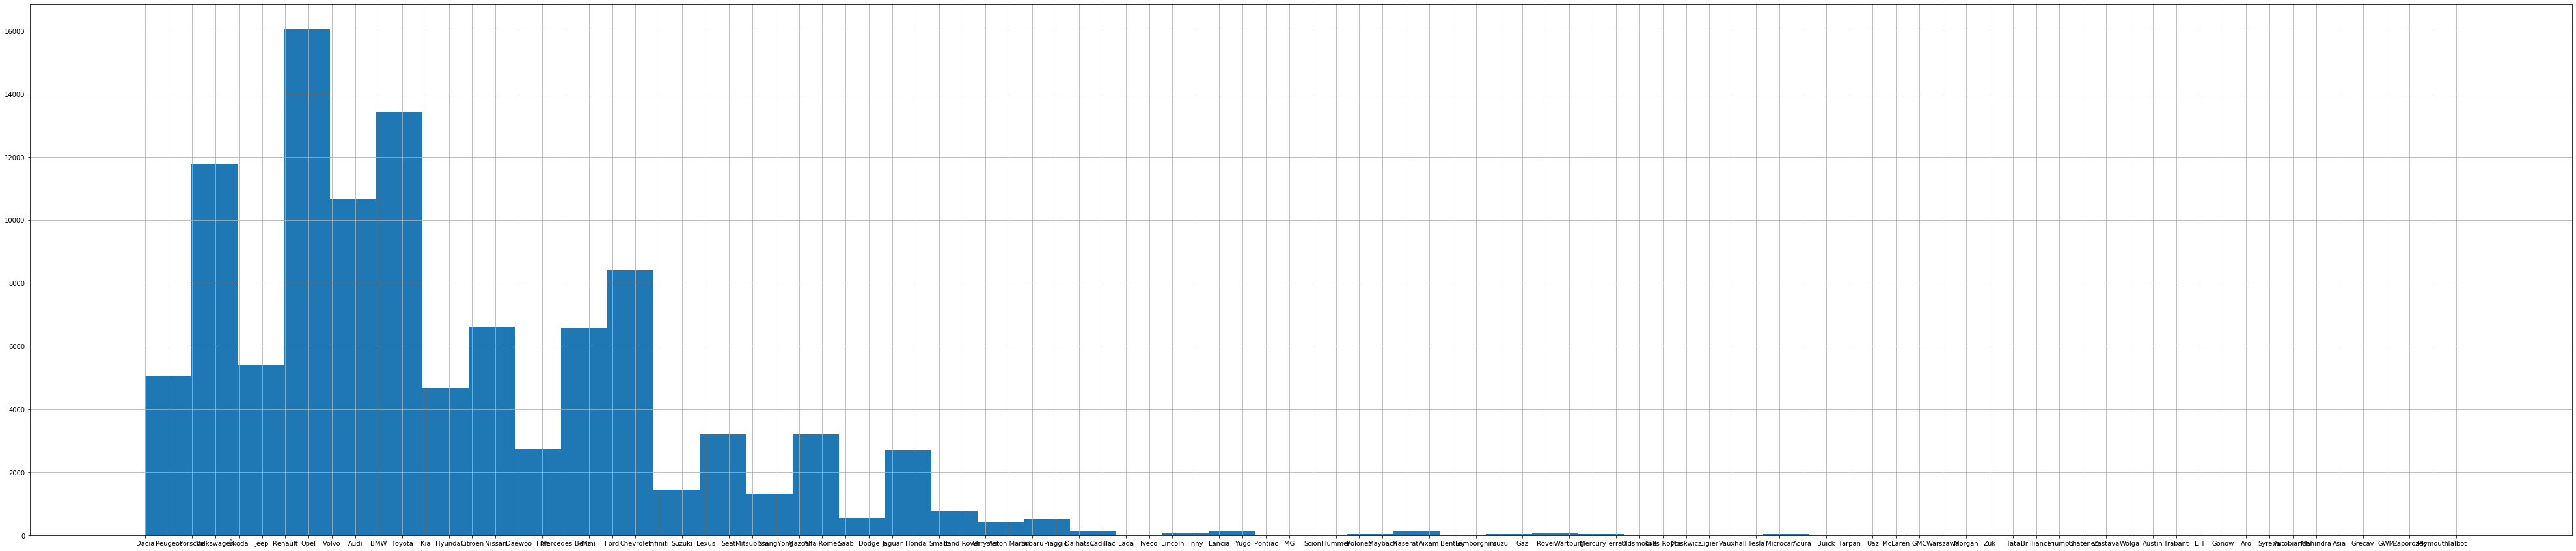

In [176]:
print(collections.Counter(train['param_marka-pojazdu']).most_common(30)) 
%matplotlib inline
# only in a Jupyter notebook
train['param_marka-pojazdu'].hist(bins=50, figsize=(70,15))
plt.show()

In [209]:
marka_df = pd.DataFrame.from_dict(collections.Counter(train['param_marka-pojazdu']), orient='index')
marka_df.sort_values(by=[0], inplace=True, ascending=False)
marka_df


,0
Volkswagen,11314
Opel,9773
BMW,8327
Audi,7960
Ford,7567
...,...
LTI,1
Morgan,1
Moskwicz,1
Zastava,1


In [7]:
import collections
import json
from ftfy import fix_encoding, fix_text

def how_many_levels(df, skipColumnsStart=-1, skipColumnsStop=-1):
    index = -1
    skipColumnsStop = 1_000_000 if skipColumnsStop==-1 else skipColumnsStop
    for column in df.columns[1:]:
        index += 1
        if index >= skipColumnsStart and index <= skipColumnsStop:
            nestedDict = False
            try:
                k = dict(collections.Counter(df[column]).most_common(7))
            except:
                cl = df[column].map(lambda row_item: fix_text(json.dumps(row_item,ensure_ascii=False).replace("  ", "").replace("\\n", "").replace("\xa0", " ")))
                k = dict(collections.Counter(cl).most_common(3))
                nestedDict = True
            print(str(index) + ': ' + ('dict-' if nestedDict else '') + column + ': ')
            print(list(k.keys()))
            print('==================================================================================================================')
        
how_many_levels(train)

0: created_at: 
['12:13, 2 marca 2018', '12:17, 2 marca 2018', '12:14, 2 marca 2018', None, '22:19, 28 lutego 2018', '12:12, 2 marca 2018', '15:08, 2 marca 2018']
1: price_currency: 
['PLN', 'EUR']
2: price_details: 
['Cena Brutto, Do negocjacji', 'Cena Brutto', 'Cena Brutto, Faktura VAT', 'Cena Brutto, Do negocjacji, Faktura VAT', 'Cena Netto, Faktura VAT', 'Cena Netto, Do negocjacji, Faktura VAT', 'Cena Netto']
3: price_value: 
[19900.0, 16900.0, 9900.0, 15900.0, 14900.0, 12900.0, 13900.0]
4: seller_address: 
['Radom, Mazowieckie', 'Lublin, Lubelskie', 'Kielce, Świętokrzyskie', 'Ostrów Mazowiecka, ostrowski, Mazowieckie', 'Bydgoszcz, Kujawsko-pomorskie', 'Ostrów Wielkopolski, ostrowski, Wielkopolskie', 'Okulickiego 3B - 05-500 Piaseczno, piaseczyński, Mazowieckie (Polska)']
5: seller_name: 
[None, 'AAA AUTO - aż 1000 samochodów w ofercie! do 24 m-cy gwarancji - CarLife! aż 80% pojazdów krajowych!', 'Master1', 'AUTO-HANDEL', 'CARSERWIS', 'Auto Handel', 'Bawaria Motors Warszawa - Deale

68: feature_esp-(stabilizacja-toru-jazdy): 
[True, False]
69: feature_alarm: 
[True, False]
70: feature_podgrzewane-tylne-siedzenia: 
[False, True]
71: feature_mp3: 
[False, True]
72: feature_tempomat: 
[True, False]
73: feature_hud-(wyświetlacz-przezierny): 
[False, True]
74: feature_elektrochromatyczne-lusterko-wsteczne: 
[False, True]
75: feature_relingi-dachowe: 
[False, True]
76: feature_elektrochromatyczne-lusterka-boczne: 
[False, True]
77: param_liczba-miejsc: 
['5', None, '7', '4', '2', '9', '6']
78: param_uszkodzony: 
[None, 'Tak']
79: param_marka-pojazdu: 
['Volkswagen', 'Opel', 'BMW', 'Audi', 'Ford', 'Renault', 'Mercedes-Benz']
80: param_model: 
[None, 'A6', 'Passat', 'A3', 'Avensis', 'C-MAX', 'Meriva']
81: param_engine-code: 
[None, '525', '320', 'E 300', 'C 220', 'A 190', '118']
82: param_liczba-drzwi: 
['5', '4', None, '3', '2', '6', '7']
83: param_first-registration: 
[None, '2 July 2005', '26 October 2010', '23 September 2013', '15 May 2007', '1 February 2016', '9 Augu

120: param_engine-power: 
[None, '150 HP', '110 HP', '100 HP', '90 HP', '190 HP', '105 HP']
121: param_year: 
[None, '2017', '2008', '2010', '2007', '2013', '2014']
122: param_serwisowany-w-aso: 
[None, 'Tak']
123: param_rodzaj-paliwa: 
['Diesel', 'Benzyna', 'Benzyna+LPG', 'Hybryda', None, 'Elektryczny', 'Benzyna+CNG']
124: param_możliwość-finansowania: 
[None, 'Tak']
125: param_registered-in-poland: 
[None, 'Tak']
126: param_transmission: 
[None, 'Na przednie koła', '4x4 (dołączany automatycznie)', '4x4 (stały)', 'Na tylne koła', '4x4 (dołączany ręcznie)']
127: param_miesięczna-rata: 
[None, '400 PLN', '600 PLN', '500 PLN', '700 PLN', '1 PLN', '450 PLN']
128: param_kod-silnika: 
[None, '320', '520', '318', '530', '525', 'E 220']
129: param_version: 
[None, 'C6 (2004-2011)', 'I (2002-2010)', 'II (2007-2014)', 'Mk3 (2010-)', '8P (2003-2012)', 'B6 (2005-2010)']
130: param_opłata-początkowa: 
[None, '1 PLN', '15 000 PLN', '20 000 PLN', '10 000 PLN', '35 000 PLN', '5 000 PLN']
131: param_m